# Exercise 3 Solution

Our todays problemset will contain exercises from the data **input and output** section, the **flow control** as well as from the function sections of the 3. lecture.I hope you all did read the self-study part on **exceptions**.

Just do our usual importing.

In [3]:
import numpy as np
import pandas as pd
import time

import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina' 

plt.rcParams.update({'font.size': 12,
                     'axes.titlesize': 20,
                     'axes.labelsize': 18,
                     'axes.labelpad': 14,
                     'lines.linewidth': 1,
                     'lines.markersize': 4,
                     'xtick.labelsize' : 16,
                     'ytick.labelsize' : 16,
                     'xtick.top' : True,
                     'xtick.direction' : 'in',
                     'ytick.right' : True,
                     'ytick.direction' : 'in',}) 

## Input & Output

1. **Read data from a file**


* Read the data from the csv file `2018-04-12_sds011_sensor_12253.csv` contained in the directory "data" with the help of the `NumPy` module. 
* Use only the last two data columns containing data (hint: some of the last columns are empty, seelct the right ones)
* skip the first row
* assign the tow columns to the NumPy arrays P1 and P2


Here are the first three lines of the text file that you can judge the file structure.

~~~
sensor_id;sensor_type;location;lat;lon;timestamp;P1;durP1;ratioP1;P2;durP2;ratioP2
12253;SDS011;6189;52.527;13.390;2018-04-12T00:00:58;31.10;;;26.03;;
12253;SDS011;6189;52.527;13.390;2018-04-12T00:03:24;35.07;;;27.60;;
~~~

In [4]:
P1,P2=np.loadtxt('data/2018-04-12_sds011_sensor_12253.csv',delimiter=';',skiprows=1,usecols=(6,9),unpack=True)

2. **Plot how the value of P1 depends on the value of P2 in a scatter plot. Use axis labels.**

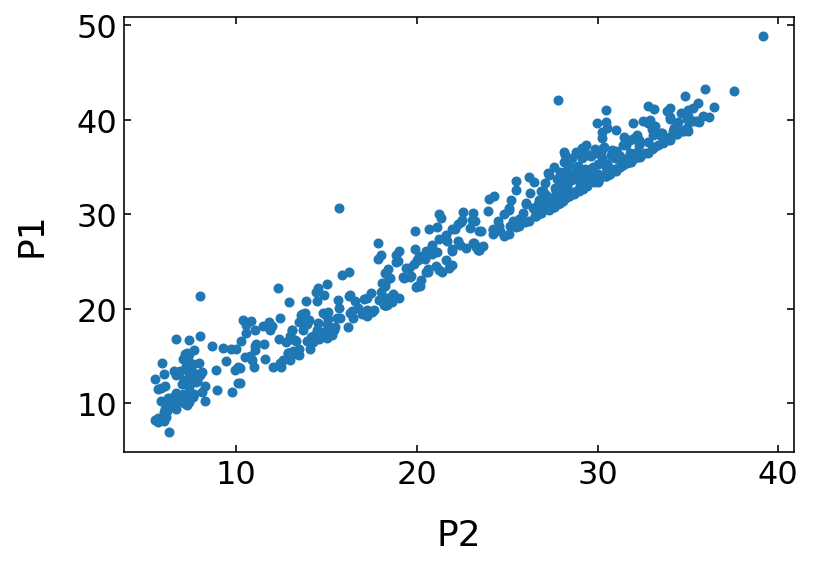

In [5]:
plt.scatter(P2,P1)
plt.xlabel('P2')
plt.ylabel('P1')
plt.show()

3. **Write a text file called `P1_P2.txt` to the data directory with the data contained in the arrays P1 and P2 as columns.**

In [9]:
# Save text file

### BEGIN SOLUTION
np.savetxt('data/P1_P2.txt',list(zip(P1,P2)))
### END SOLUTION

4. **Load the same csv file with the help of `pandas.read_csv`. Load the column 5,6 and 9 only into one dataframe df.**

In [10]:
# Read with pandas

### BEGIN SOLUTION
df=pd.read_csv('data/2018-04-12_sds011_sensor_12253.csv',delimiter=';',usecols=(5,6,9))
### END SOLUTION

## Flow Control

### Loops


**while-loop**

Write a program to calculate the factorial of a positive integer input by the user. Recall that the factorial function is given by x! = x(x − 1)(x − 2)...(2)(1) so that 1! = 1, 2! = 2, 3! = 6, 4! = 24, ...

Write the factorial function using a Python while loop by defining before the function the value of `x`.


In [11]:
### BEGIN SOLUTION
x=4
i=1
fac=1
while i<=x:
    fac=fac*i
    i=i+1
print(fac)    
### END SOLUTION

24


**for-loop**

Write the factorial function using a Python for loop.


In [12]:
### BEGIN SOLUTION
x=4
fac=1
for i in range(1,x+1):
    fac=fac*i
print(fac)    
### END SOLUTION

24


## Functions

### User defined functions

Within lecture 3, we have provided a simple way of calculating first and second deraivatives of a function by another function.

The *n*-th derivative can be approximately calculated by 

\begin{equation}
  \frac{d^{n}f(x)}{dx^{n}}\approx \frac{1}{h^{n}}\sum_{i=0}^{n}(-1)^{i}
  \begin{pmatrix}
  n\\
  i
  \end{pmatrix}
  f(x+(n-i)h)
\end{equation}

where 

\begin{pmatrix}
n\\
i
\end{pmatrix}

is the binomial coefficient which is available from the scipy module by

~~~
from scipy.special import binom
~~~


1. **Write a function that delivers the n-th derivative of a function f using the above formula. To calculate the derivative provide the stepping parameter `h=1e-2` and the order `n=1` as a default value.**

In [6]:
### BEGIN SOLUTION
from scipy.special import binom

def deriv(f,x,n=1,h=1e-3,*params):
    tmp=np.array([(-1)**i*binom(n,i)*f(x+(n-i)*h,*params) for i in range(n+1)])/h**n
    return(np.sum(tmp,axis=0))
### END SOLUTION

2. **Write a simple function `f0(x,a)` that returns $a\cdot x^{5}$.**

In [12]:
### BEGIN SOLUTION
def f0(x,a):
    return(a*x**5)
### END SOLUTION

3. **Plot the 4th derivative of that function.**

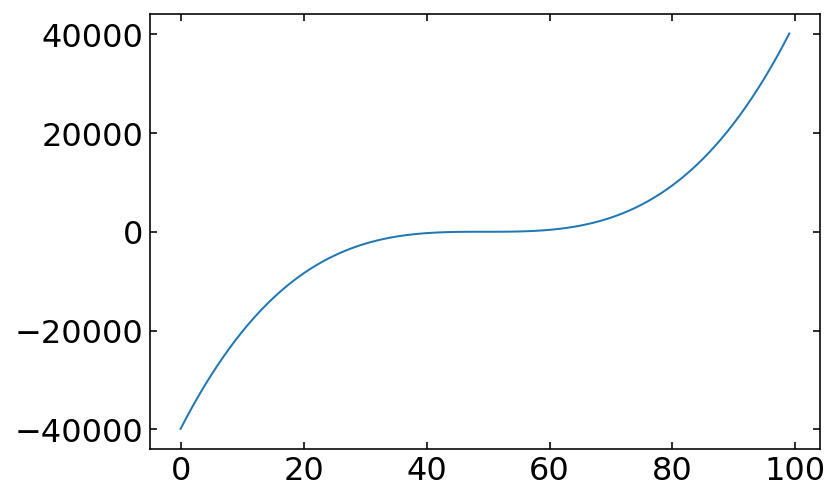

In [10]:
### BEGIN SOLUTION
x=np.linspace(-10,10,100)
d4f=deriv(f0,x,2,1e-2,2)
plt.plot(d4f)
plt.show()
### END SOLUTION

### Lambda function

The text file we have loaded at the beginning has a column with a timestamp, which is useful to see when the sensor data has been recorded. We want to read that timestamp and convert the time into seconds. There are multiple ways to do that but we will use the `converters` and a `lambda` function, just to practive that

NumPy can handle timestamps with the function np.datetime64('2018-04-12T00:00:58'), which converts a string into the type `datetime64`. This allows you to subtract times or also to extract the hour, minute or second for example by

~~~
second=np.datetime64('2018-04-12T00:00:58').item().second
minute=np.datetime64('2018-04-12T00:00:58').item().minute
hour=np.datetime64('2018-04-12T00:00:58').item().hour
~~~



1. **Create a lambda function which converts a string into a np.datetime64 variable and returns the seconds in that string. Assign the lambda function to a variable `seconds`.**

In [25]:
### BEGIN SOLUTION
seconds = lambda x: np.datetime64(x).item().second
### END SOLUTION

2. **Create equivalent lambda function for extracting the minutes and the hours and assign them to `minutes` and `hours`.**

In [26]:
### BEGIN SOLUTION
minutes = lambda x: np.datetime64(x).item().minute
hours = lambda x: np.datetime64(x).item().hour
### END SOLUTION

3. **Finally write a lambda function that calculates the total seconds of the day with the help of the previously defined lambda functions. Assign the lambda function to `total_seconds`.**

In [27]:
### BEGIN SOLUTION
total_seconds = lambda x: hours(x)*3600+minutes(x)*60+seconds(x)
### END SOLUTION

You may use converters to directly convert the strings loaded by the `loadtxt` function during loading. The way to include that is to provide the `converters` statement of the `loadttxt` with a dictionary, which contains as a key the column number and as the value for that key the function name, i.e. our lambda function. You can apply a different conversion to each column. 

~~~
data=np.loadtxt(...,converters={5:function},...)
~~~



4. **Use the `total_seconds` lambda function as a converter in the `numpy.loadtxt` function to convert the timstamp directly into seconds. Import only the timestamp and store the total seconds in the array `tot_seconds`.**

In [20]:
### BEGIN SOLUTION
tot_seconds=np.loadtxt("data/2018-04-12_sds011_sensor_12253.csv", skiprows=1,delimiter=";",
                       usecols=(5),converters={5:total_seconds})
### END SOLUTION

5. **Plot the value of P1 and P2 as a function of the hour of the day. Provide a axis labels, legend and labels!**

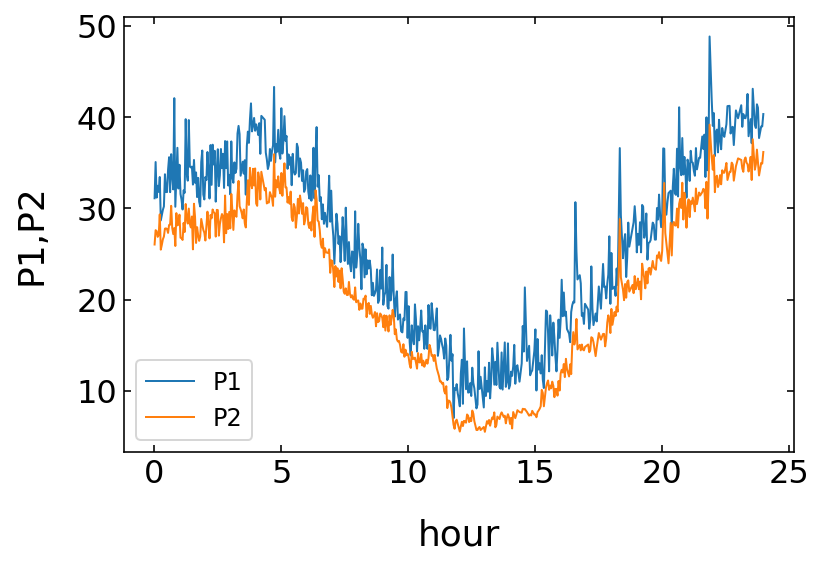

In [21]:
### BEGIN SOLUTION
plt.plot(tot_seconds/3600,P1,label='P1')
plt.plot(tot_seconds/3600,P2,label='P2')
plt.xlabel('hour')
plt.ylabel('P1,P2')
plt.legend()
plt.show()
### END SOLUTION